## This notebook is about learning data analysis using Python ##

### Focus is data normalization ###

Step 1 : Data standardization

Standardization is the process of transforming data into a common format which allows the researcher to make a meaningful comparison.

In [1]:
# Let's first get our data ready (cf notebook on data wrangling)

import pandas as pd
import matplotlib.pylab as plt
import numpy as np

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(filename, names = headers)
df.replace("?", np.nan, inplace = True)
df.head(5)
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
avg_bore=df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)
avg_stroke=df['stroke'].astype('float').mean(axis=0)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)
df["num-of-doors"].replace(np.nan, "four", inplace=True)
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")


In [2]:
# We can apply data transformation to transform mpg into L/100km for example
# Let's use the following conversion rate: L/100km = 235 / mpg

print (df.head(1))
df['city-L/100km'] = 235/df["city-mpg"]
print (df.head(1))

   symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0        111   

   peak-rpm city-mpg  highway-mpg    price  
0    5000.0       21           27  13495.0  

[1 rows x 26 columns]
   symboling  normalized-losses         make fuel-type aspiration  \
0          3                122  alfa-romero       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   

   fuel-system  bore  stroke  compression-ratio horsepower peak-rpm  city-mpg  \
0         mpfi  3.47    2.68                9.0        111   5000.0  

In [3]:
# Let'snow apply the transformation to the column highway-mpg and rename it

df['highway-mpg'] = 235/df["highway-mpg"]
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


Step 2 : Data normalization

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

In [4]:
# To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height"
# Let's Normalize those variables so their value ranges from 0 to 1.
# We replace the original value by (original value)/(maximum value)

print (df[["length","width","height"]].head())

df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

print ('\n',df[["length","width","height"]].head())


   length  width  height
0   168.8   64.1    48.8
1   168.8   64.1    48.8
2   171.2   65.5    52.4
3   176.6   66.2    54.3
4   176.6   66.4    54.3

      length     width    height
0  0.811148  0.890278  0.816054
1  0.811148  0.890278  0.816054
2  0.822681  0.909722  0.876254
3  0.848630  0.919444  0.908027
4  0.848630  0.922222  0.908027


Here we can see, we've normalized "length", "width" and "height" in the range of [0,1].

Step 3 : Data binning

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

Text(0.5, 1.0, 'horsepower bins')

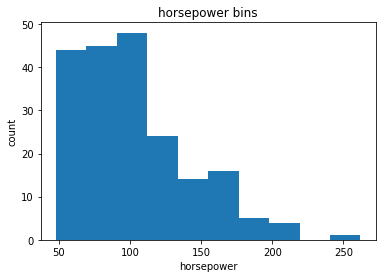

In [5]:
# In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. 
# What if we only care about the price difference between cars with high horsepower, medium horsepower, 
# and little horsepower (3 types)? Let's rearrange them into three ‘bins' to simplify the analysis

# Let's first convert to the correct data type
df["horsepower"]=df["horsepower"].astype(int, copy=True)

# We can plot the results to verify the distribution

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")


In [6]:
# We would like 3 bins of equal size bandwidth so we can use numpy's linspace function with the 
# following parameters: start_value, end_value, numbers_generated function.
# Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]).
# Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]).
# Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.
# We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. 

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [7]:
# Let's do some formatting and set group names:
group_names = ['Low', 'Medium', 'High']

# Now we associate the names with the bins using function "cut"
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(5)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [8]:
# We can verify the number of vehicles in each bin
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

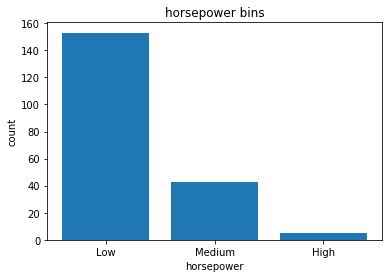

In [9]:
# let's then plot the distribution of each bin

pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Step 4 : Indicator variable (or dummy variable)

An indicator variable (or dummy variable) is a numerical variable used to label categories.
They are called 'dummies' because the numbers themselves don't have inherent meaning.
The categorical variables can then be used for regression analysis.

In [10]:
# Column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.
# We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type.

print (df.columns)

dummy_variable_1 = pd.get_dummies(df["fuel-type"])

print (dummy_variable_1.head())
print (dummy_variable_1.tail())

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')
   diesel  gas
0       0    1
1       0    1
2       0    1
3       0    1
4       0    1
     diesel  gas
196       0    1
197       0    1
198       0    1
199       1    0
200       0    1


In [11]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

df.tail()


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114,5400.0,23,8.392857,16845.0,10.217391,Low,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160,5300.0,19,9.400000,19045.0,12.368421,Medium,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134,5500.0,18,10.217391,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106,4800.0,26,8.703704,22470.0,9.038462,Low,1,0
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,9.5,114,5400.0,19,9.400000,22625.0,12.368421,Low,0,1


The last two columns are now the indicator variable representation of the fuel-type variable. Either 1 or 0.